# Record Compilation

In [1]:
import os
from pathlib import Path
import utilities as util
import pandas as pd

In [2]:
from numpy import int64


def define_dtypes(df):
    df['Month'] = df['Month'].astype(str)
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)
    df['Quarter'] = df['Quarter'].astype(str)
    df['District'] = df['District'].astype(str)
    df['Street'] = df['Street'].astype(str)
    df['Control Number'] = pd.to_numeric(df['Control Number'], errors='coerce').astype('Int64')
    df['Account Name'] = df['Account Name'].astype(str)
    df['Connection Type'] = df['Connection Type'].astype(str)
    df['Service Address'] = df['Service Address'].astype(str)
    df['Previous Reading'] = df['Previous Reading'].astype(str)
    df['Present Reading'] = df['Present Reading'].astype(str)
    df['Cleaned Previous Reading'] = pd.to_numeric(df['Cleaned Previous Reading'], errors='coerce').astype('Int64')
    df['Cleaned Present Reading'] = pd.to_numeric(df['Cleaned Present Reading'], errors='coerce').astype('Int64')
    df['Cleaned Consumption'] = pd.to_numeric(df['Cleaned Consumption'], errors='coerce').astype('Int64')
    df['Record Status'] = df['Record Status'].astype(str)
    df['Connection Status'] = df['Connection Status'].astype(str)
    return df

base_dir_path = Path("../../dataset/clean/production/pre_production")
years = os.listdir(base_dir_path)

production_output_dir_path = Path("../../dataset/clean/production/production/v1")
training_output_dir_path = Path("../../dataset/clean/training/production/v1")

production_output_dir_path.mkdir(parents=True, exist_ok=True)
training_output_dir_path.mkdir(parents=True, exist_ok=True)

final_columns = [
    "Month",
    "Year",
    "Quarter",
    "District",
    "Street",
    "Control Number",
    "Connection Type",
    "Service Address",
    "Previous Reading",
    "Present Reading",
    "Cleaned Previous Reading",
    "Cleaned Present Reading",
    "Cleaned Consumption",
    "Record Status",
    "Connection Status",
]

consolidated_df = pd.DataFrame()

for year in years:
    year_path = base_dir_path / year
    files = [f for f in os.listdir(year_path) if f.endswith(".csv") and not f.startswith("cleaned_")]
    
    for file in files:
        file_path = year_path / file
        df = util.read_csv(file_path)
        if df is not None:
            try:
                consolidated_df = pd.concat([consolidated_df, df], ignore_index=True)
                print(f"✅ Successfully concatenated {file}")
            except Exception as e:
                print(f"Error concatenating {file}: {e}")

try:
    consolidated_df = define_dtypes(consolidated_df)
    util.save_csv(consolidated_df, production_output_dir_path / "consolidated.csv")

    training_df = consolidated_df.drop('Account Name', axis=1)
    util.save_csv(training_df, training_output_dir_path / "consolidated.csv")
except Exception as e:
    print(f"Error saving consolidated file: {e}")

print(f"✅ Successfully saved consolidated file to {production_output_dir_path / "consolidated.csv"}")
print(f"✅ Successfully saved consolidated file to {training_output_dir_path / "consolidated.csv"}")



✅ Successfully concatenated DEC_2019_pre_production.csv
✅ Successfully concatenated APR_2020_pre_production.csv
✅ Successfully concatenated AUG_2020_pre_production.csv
✅ Successfully concatenated DEC_2020_pre_production.csv
✅ Successfully concatenated FEB_2020_pre_production.csv
✅ Successfully concatenated JAN_2020_pre_production.csv
✅ Successfully concatenated JUL_2020_pre_production.csv
✅ Successfully concatenated JUN_2020_pre_production.csv
✅ Successfully concatenated MAR_2020_pre_production.csv
✅ Successfully concatenated MAY_2020_pre_production.csv
✅ Successfully concatenated NOV_2020_pre_production.csv
✅ Successfully concatenated OCT_2020_pre_production.csv
✅ Successfully concatenated SEP_2020_pre_production.csv
✅ Successfully concatenated APR_2022_pre_production.csv
✅ Successfully concatenated AUG_2022_pre_production.csv
✅ Successfully concatenated DEC_2022_pre_production.csv
✅ Successfully concatenated FEB_2022_pre_production.csv
✅ Successfully concatenated JAN_2022_pre_product

# Record Visualization

In [3]:
import utilities as utils

version = "v1"
consolidated_df = utils.read_csv(f"../../dataset/clean/training/production/{version}/consolidated.csv")
print("Production Dataset")
consolidated_df.head()
consolidated_df.info()

version = "v1"
consolidated_df = utils.read_csv(f"../../dataset/clean/production/production/{version}/consolidated.csv")
print("Training Dataset")
consolidated_df.head()
consolidated_df.info()



Production Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105044 entries, 0 to 105043
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     105044 non-null  object 
 1   Year                      105044 non-null  int64  
 2   Quarter                   105044 non-null  object 
 3   District                  91603 non-null   object 
 4   Street                    105044 non-null  object 
 5   Control Number            104992 non-null  float64
 6   Connection Type           104888 non-null  object 
 7   Service Address           105044 non-null  object 
 8   Previous Reading          83279 non-null   object 
 9   Present Reading           76833 non-null   object 
 10  Cleaned Previous Reading  84315 non-null   float64
 11  Cleaned Present Reading   84315 non-null   float64
 12  Cleaned Consumption       105044 non-null  int64  
 13  Record Status            

c:\Users\Mark June Almojuela\OneDrive - Bicol University\WaterFlow\AI\Model Training\data_preparation\v1\utilities.py:20: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


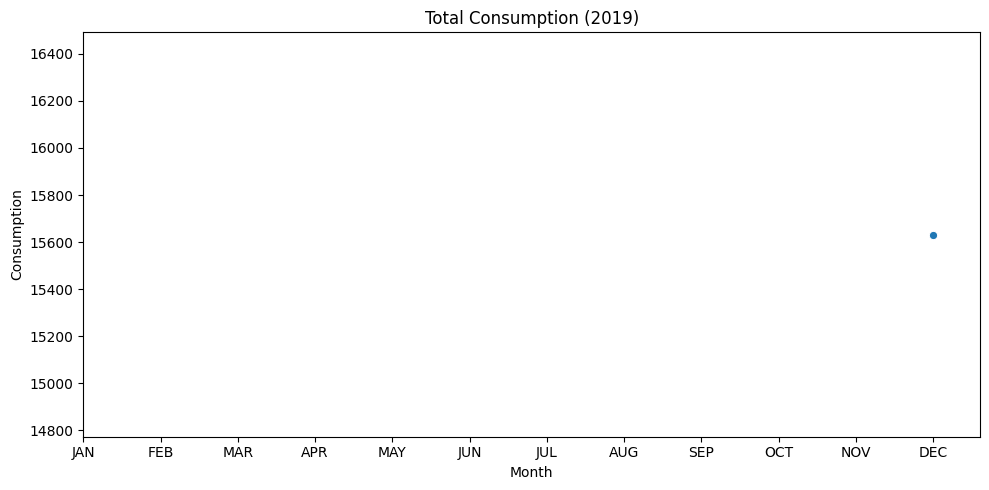

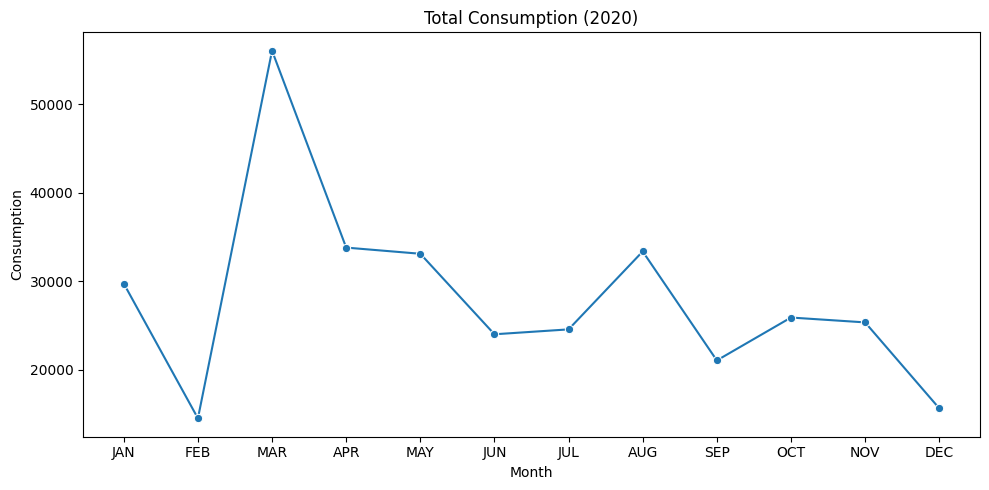

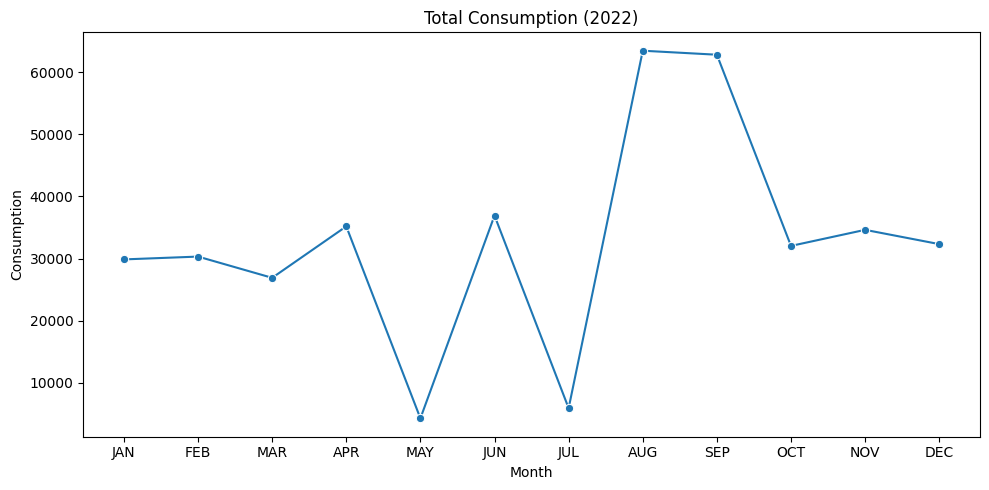

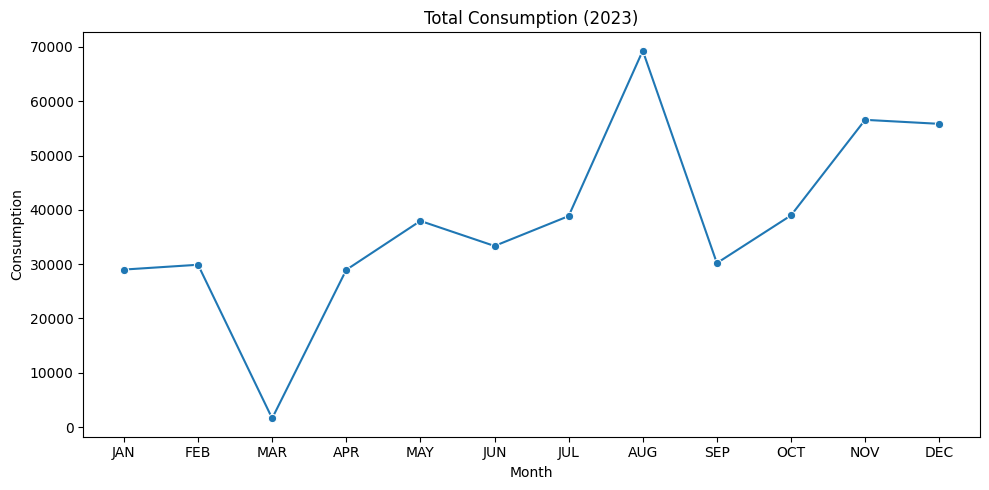

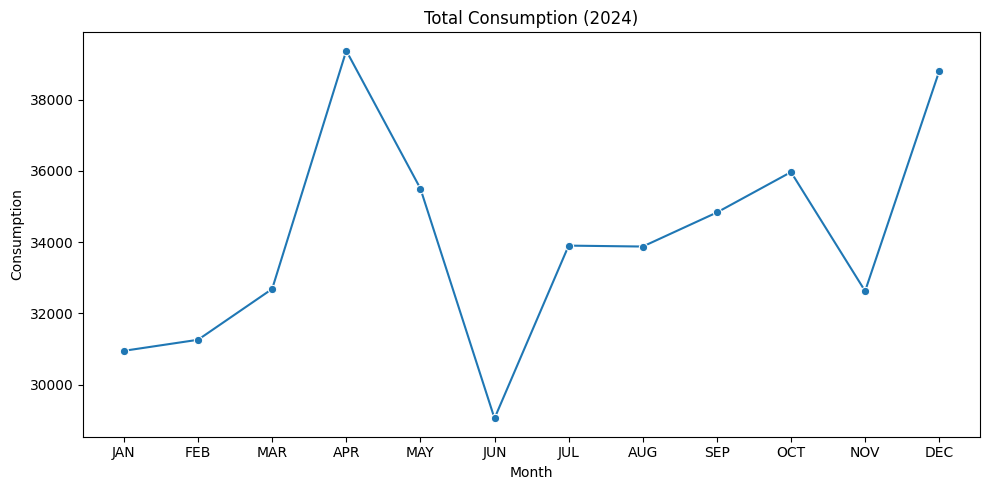

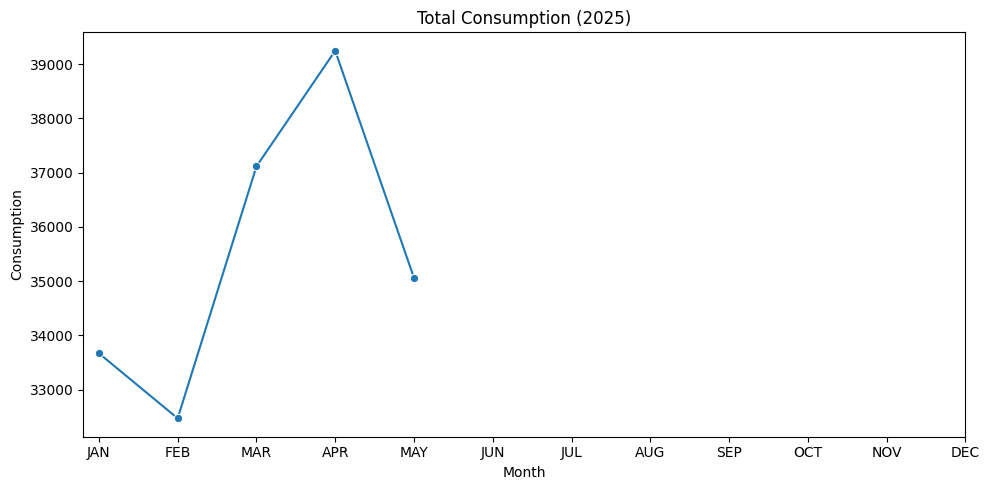

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import pandas as pd

# Define data path

path = "../../dataset/clean/training/production/v1/consolidated.csv"

# Concatenate into a single DataFrame
consumer_record = pd.read_csv(path)

# --- Ensure numeric Cleaned Present Reading ---
consumer_record['Cleaned Present Reading'] = pd.to_numeric(
    consumer_record['Cleaned Present Reading'], errors='coerce'
)

# --- Month Order ---
month_order = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN",
               "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

# --- Group by Year + Month ---
monthly_data = (
    consumer_record.groupby(['Year', 'Month'], sort=False)['Cleaned Consumption']
    .sum()
    .reset_index()
)

# --- Ensure Month ordering ---
monthly_data['Month'] = pd.Categorical(
    monthly_data['Month'], categories=month_order, ordered=True
)

monthly_data = monthly_data.sort_values(['Year', 'Month'])

# --- Unique Years ---
years = monthly_data['Year'].unique()

# --- Plot: One Graph per Year ---
for year in years:
    yearly_data = monthly_data[monthly_data['Year'] == year]
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(
        x='Month', y='Cleaned Consumption', 
        marker='o', data=yearly_data
    )
    
    plt.title(f"Total Consumption ({year})")
    plt.ylabel("Consumption")
    plt.xlabel("Month")
    plt.xticks(month_order) 
    plt.tight_layout()
    plt.show()
